<a href="https://colab.research.google.com/github/naanadr/face_detection_projects/blob/master/face_detection_tdc_recife/face_detection_tdc_recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/naanadr/face_detection_projects.git

Cloning into 'face_detection_projects'...
remote: Enumerating objects: 601, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (553/553), done.
remote: Total 2233 (delta 51), reused 554 (delta 17), pack-reused 1632
Receiving objects: 100% (2233/2233), 196.32 MiB | 30.20 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Checking out files: 100% (643/643), done.


In [2]:
cd face_detection_projects/face_detection_tdc_recife/

/content/face_detection_projects/face_detection_tdc_recife


# Vamos para um pouco de código o/

# Imports

In [1]:
%matplotlib inline
import collections
import cv2
import dlib
from imutils import face_utils
from matplotlib import pyplot as plt
import numpy as np

# from google.colab.patches import cv2_imshow

# Helpers


In [2]:
FACIAL_LANDMARKS_IDXS = collections.OrderedDict([
        ("mouth", (48, 68)),
        ("right_eyebrow", (17, 22)),
        ("left_eyebrow", (22, 27)),
        ("right_eye", (36, 42)),
        ("left_eye", (42, 48)),
        ("nose", (27, 35)),
        ("jaw", (0, 17))
    ])

In [3]:
def visualize_facial_landmarks(image, shape, colors, alpha):
    overlay = image.copy()
    output = image.copy()

    if colors is None:
        colors = [(168, 100, 168), (79, 76, 240), (230, 159, 23),
                  (10, 10, 252), (10, 10, 252),
                  (163, 38, 32), (40, 42, 20)]

    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        if name == "jaw":
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    return output


In [4]:
def facial_landmarks(image=None, predictor=None, detector=None,
                     colors=None, alpha=0.75):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)  

    return visualize_facial_landmarks(image, shape, colors, alpha)
  

In [5]:
def get_coordinates(image, region, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    rects = detector(gray, 1)
    pts = []

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)  

    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        if name == region:
            (j, k) = FACIAL_LANDMARKS_IDXS[name]
            pts.append(shape[j:k])

    return pts


In [6]:
def face_detection(frame, detector):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 1)

    output = frame.copy()

    if len(rects) > 0:
        cv2.putText(output, "Rostos detectados {}".format(len(rects)), (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    for rect in rects:
        (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
        cv2.rectangle(output, (bX, bY), (bX + bW, bY + bH),
                      (0, 255, 0), 2)

    return output
  

In [7]:
def draw_line(frame, points):
    output = frame.copy()

    for index, item in enumerate(points): 
        if index == len(points) -1:
            break
        cv2.line(output, item, points[index + 1], [0, 255, 0], 2) 

    return output

In [8]:
def landmarks_draw(image, detector, predictor):
    frame = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        for rect in rects:
            points = []

            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            for (i, (x, y)) in enumerate(shape):
                if i < 17:
                    points.append((x, y))

            frame = draw_line(frame, points)

    return frame

In [9]:
def landmarks_detection(image, detector, predictor):
    frame = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        for (i, (x, y)) in enumerate(shape):
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
            cv2.putText(frame, str(i + 1), (x - 10, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

    return frame

# Códigos!!!


## Dlib detecção de rosto

Preparativos...


In [10]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('helpers/'
                                 'shape_predictor_68_face_landmarks.dat')

## O poder do Dlib

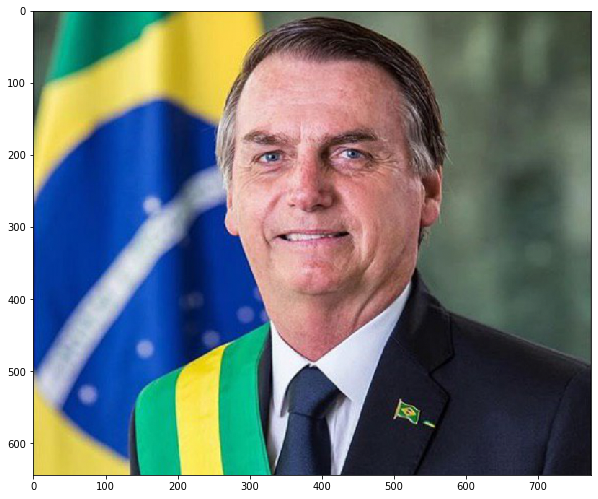

In [11]:
image_01 = cv2.imread('persons/bolsonaro.png')
image_01 = cv2.cvtColor(image_01, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_01)
plt.show()

## Capturar a região do rosto

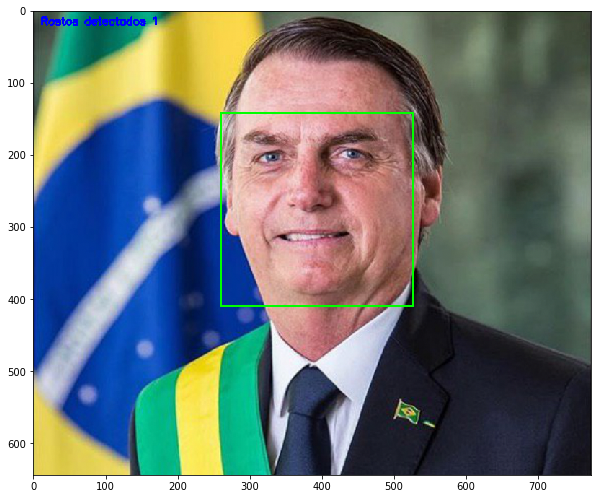

In [12]:
face = face_detection(image_01, detector)

plt.figure(figsize=(10, 10))
plt.imshow(face)
plt.show()

### Será que continua capturando o rosto se a imagem estiver alterada?

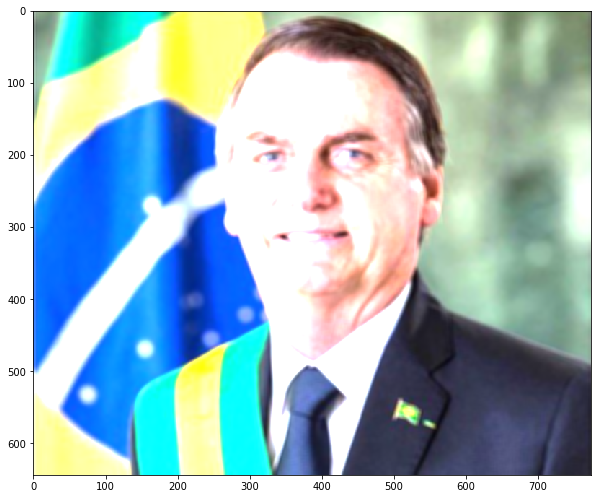

In [13]:
kernel = np.ones((7, 7),np.float32)/25
result_2d_filter = cv2.filter2D(image_01,-1,kernel)

plt.figure(figsize=(10, 10))
plt.imshow(result_2d_filter)
plt.show()

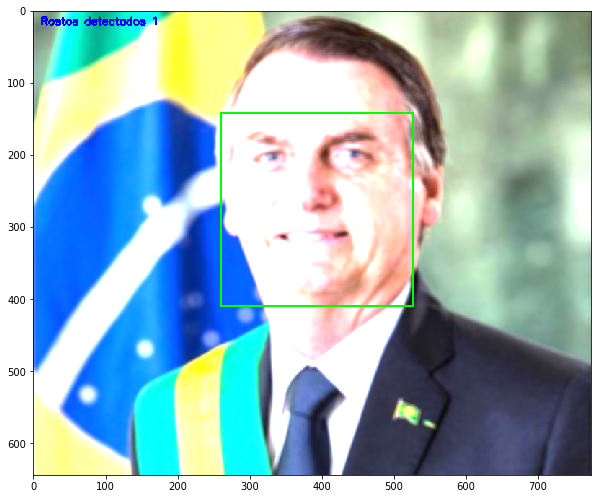

In [14]:
face = face_detection(result_2d_filter, detector)

plt.figure(figsize=(10, 10))
plt.imshow(face)
plt.show()

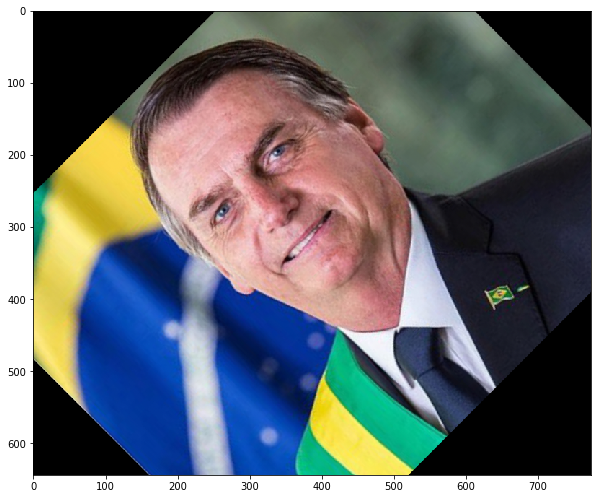

In [15]:
rows, cols, _ = image_01.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)
rotate_image_01 = cv2.warpAffine(image_01,M,(cols,rows))

plt.figure(figsize=(10, 10))
plt.imshow(rotate_image_01)
plt.show()

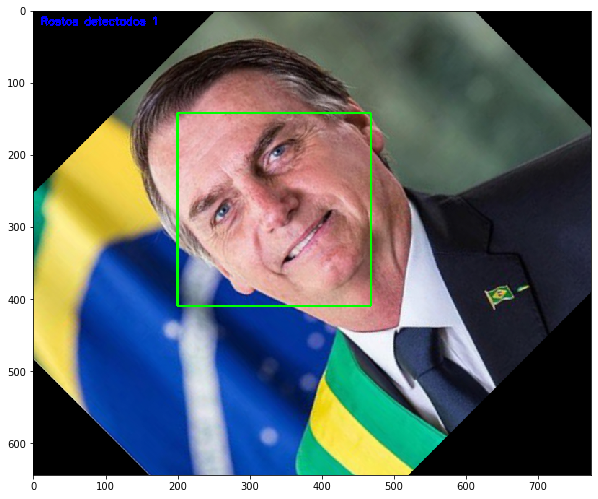

In [16]:
face = face_detection(rotate_image_01, detector)

plt.figure(figsize=(10, 10))
plt.imshow(face)
plt.show()


## E se tiver mais de um rosto?

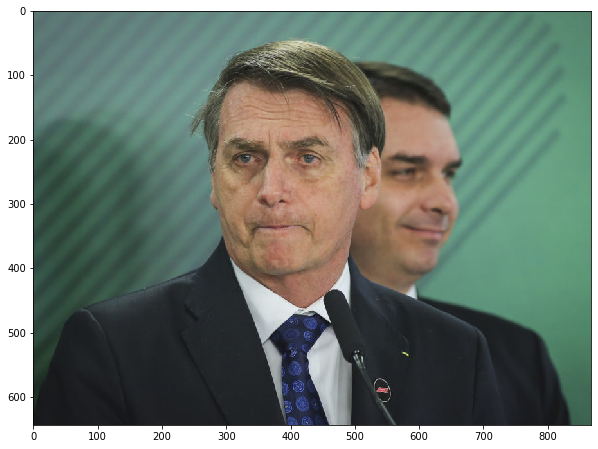

In [17]:
image_02 = cv2.imread('persons/bolsonaro_02.jpg')
image_02 = cv2.cvtColor(image_02, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_02)
plt.show()

## Será que ele detecta mesmo todos os rostos?


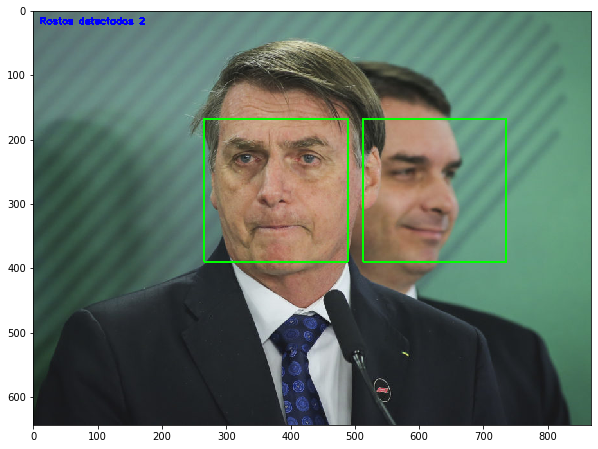

In [18]:
faces = face_detection(image_02, detector)

plt.figure(figsize=(10, 10))
plt.imshow(faces)
plt.show()

# Pontos de interesse do rosto



![alt text](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg)


## Vamos ver esses pontos nas imagens

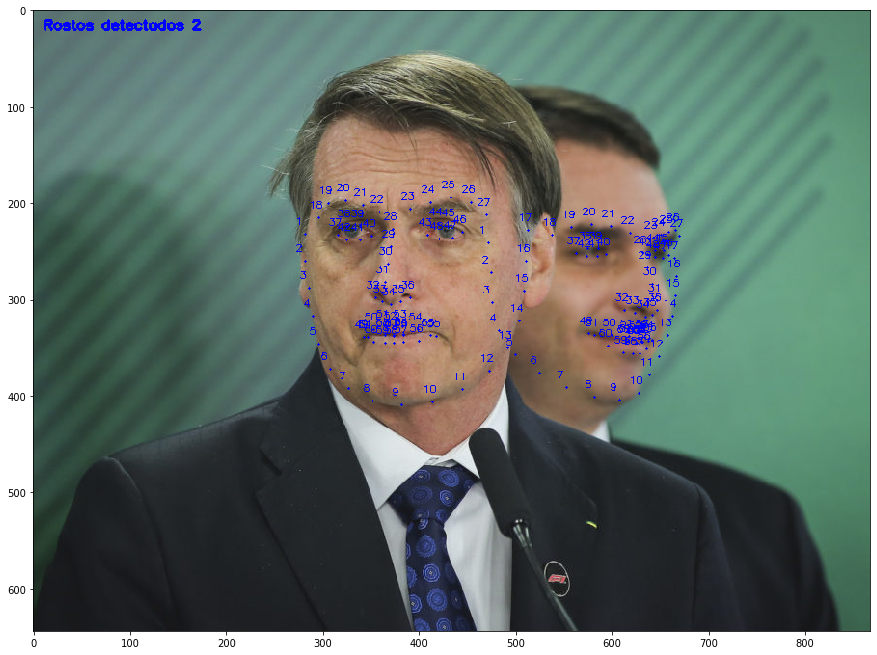

In [19]:
land = landmarks_detection(image_02, detector, predictor)

plt.figure(figsize=(15, 15))
plt.imshow(land)
plt.show()

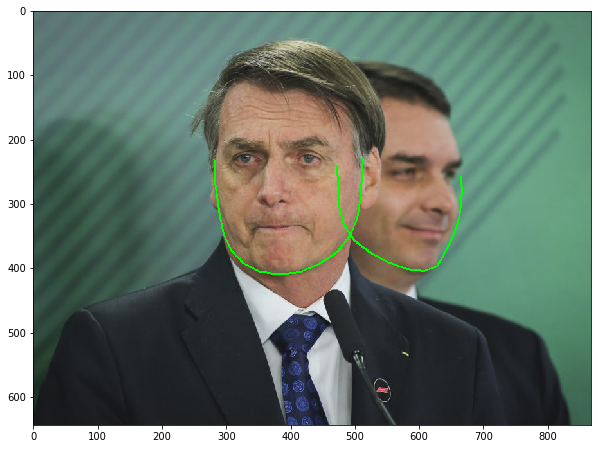

In [20]:
land = landmarks_draw(image_02, detector, predictor)

plt.figure(figsize=(10, 10))
plt.imshow(land)
plt.show()

## Regiões de interesse do rosto

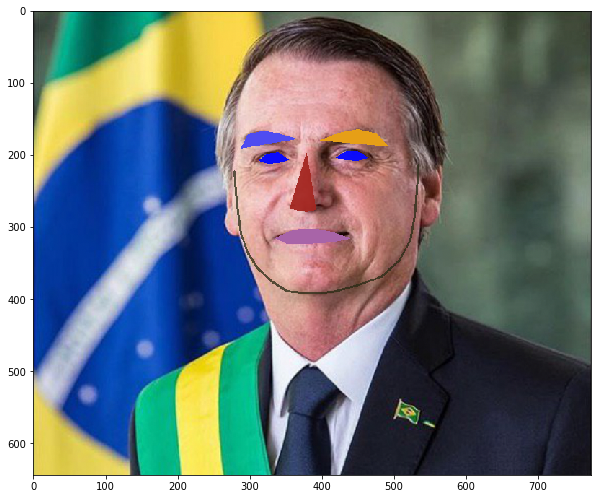

In [21]:
land = facial_landmarks(image_01, predictor, detector)

plt.figure(figsize=(10, 10))
plt.imshow(land)
plt.show()

## Vamos brincar um pouco com essas regiões de interesse... ou tentar.

In [22]:
overlay = image_01.copy()
pts = get_coordinates(image_01, 'mouth', detector, predictor)[0]

for l in range(1, len(pts)):
    ptA = tuple(pts[l - 1])
    ptB = tuple(pts[l])
    cv2.line(overlay, ptA, ptB, (0, 255, 0), 2)

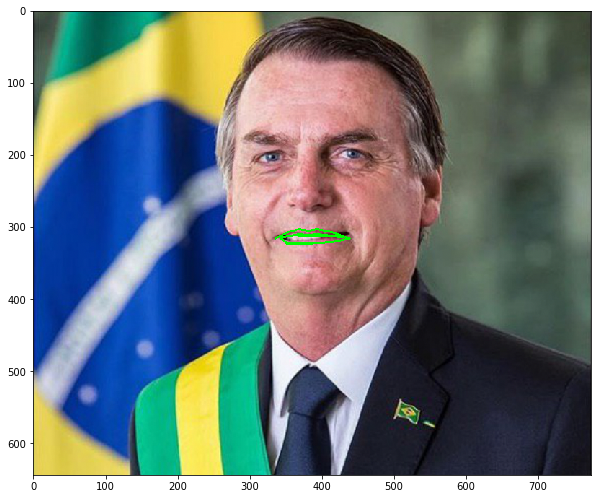

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()

## Ops... Vamos tentar de novo...

In [24]:
overlay = image_01.copy()
pts = get_coordinates(image_01, 'mouth', detector, predictor)[0]

In [25]:
ptA = tuple(pts[0])  # Canto esquerdo da boca
ptB = tuple(pts[6])  # Canto direito da boca

ptC = tuple(pts[3])  # Canto superior da boca
ptD = tuple(pts[9])  # Canto inferior da boca

h = abs(ptC[1] - ptD[1])
w = abs(ptA[0] - ptB[0])

# img[y:y+h, x:x+w]
new_overlay = overlay[ptA[1]: ptA[1] + h, ptA[0]: ptA[0] + w]

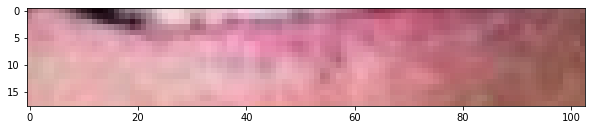

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(new_overlay)
plt.show()

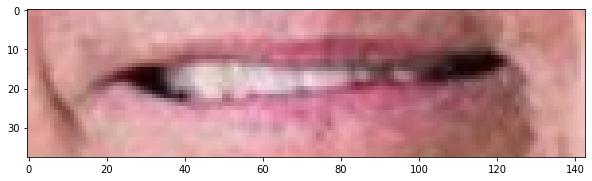

In [27]:
offset = 20

# img[y:y+h, x:x+w]
new_overlay = overlay[ptA[1] - offset: ptA[1] + h,
                      ptA[0] - offset: ptA[0] + w + offset]
plt.figure(figsize=(10, 10))
plt.imshow(new_overlay)
plt.show()

### Que tal um pouco de barba?

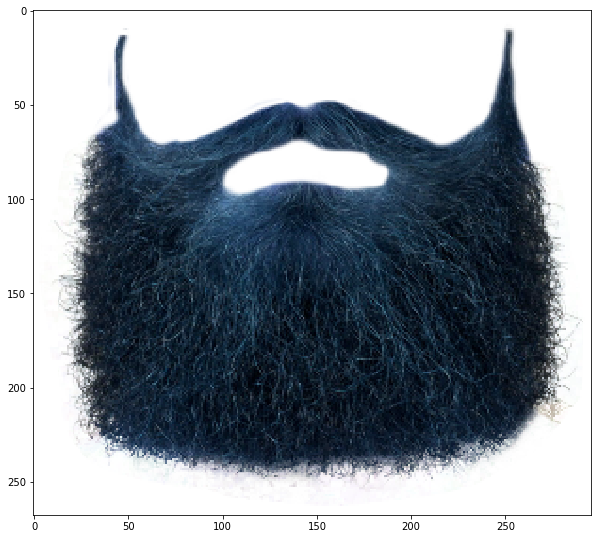

In [28]:
sticker = cv2.imread('stickers/barba_02.png', -1)
watermark = cv2.resize(sticker, None, fx=0.4, fy=0.4)

plt.figure(figsize=(10, 10))
plt.imshow(watermark)
plt.show()

In [29]:
frame = cv2.cvtColor(image_01, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape

In [30]:
overlay = frame.copy()
watermark_h, watermark_w, watermark_c = watermark.shape

In [31]:
for i in range(0, watermark_h):
    for j in range(0, watermark_w):
        if watermark[i, j][3] != 0:
            w_offset = ptB[0] - (w*2)  # ptB é o canto direito da boca
            h_offset = ptD[1] - (int(ptD[1]/5) + offset)  # ptD é o canto inferior da boca
            overlay[h_offset + i, w_offset + j] = watermark[i, j]

overlay = cv2.cvtColor(overlay, cv2.COLOR_BGRA2RGB)

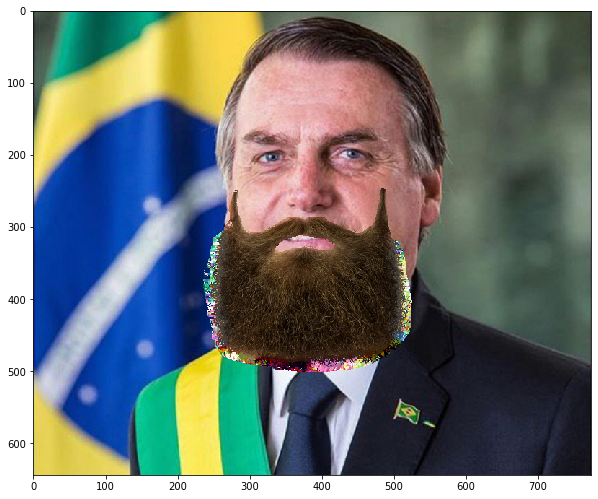

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()

### Ou um óculos?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


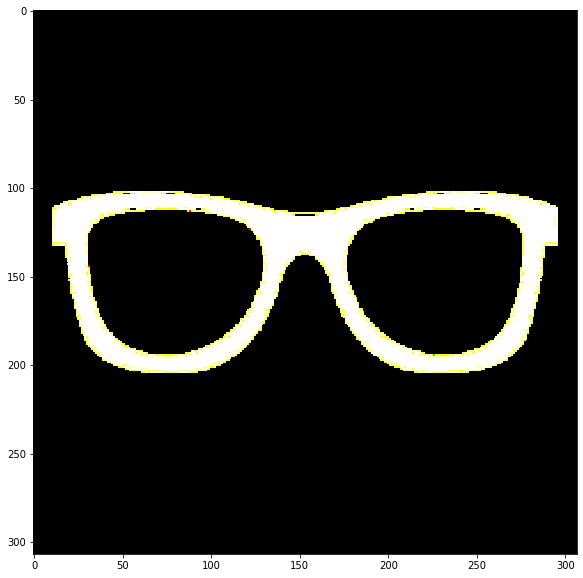

In [33]:
stickers = cv2.imread('stickers/oculos_01.png', -1)
watermark = cv2.resize(stickers, None, fx=0.6, fy=0.6)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGRA2RGB))
plt.show()

### Precisamos saber onde está os olhos...

In [34]:
overlay = image_01.copy()
pts = get_coordinates(image_01, 'right_eye', detector, predictor)[0]

ptA = tuple(pts[0])  # Canto esquerdo do olho
ptB = tuple(pts[3])  # Canto direito do olho

ptC = tuple(pts[1])  # Canto superior do olho
ptD = tuple(pts[5])  # Canto inferior do olho

h = abs(ptC[1] - ptD[1])
w = abs(ptA[0] - ptB[0])
offset = 30

# img[y:y+h, x:x+w]
overlay = overlay[ptA[1] - offset: ptA[1] + h,
                  ptA[0] - offset: ptA[0] + w + offset]

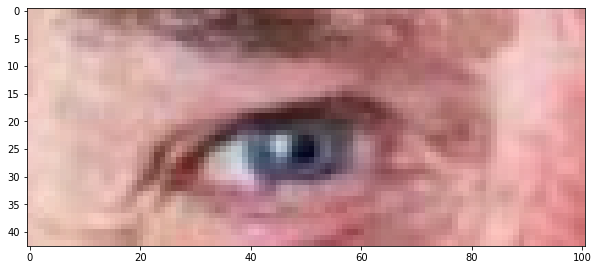

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()

### E agora vamos ajudar ele a enxergar melhor :)

In [36]:
frame = cv2.cvtColor(image_01, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape

# overlay with 4 channels BGR and Alpha
overlay = frame.copy()
watermark_h, watermark_w, watermark_c = watermark.shape

# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
    for j in range(0, watermark_w):
        if watermark[i,j][3] != 0:
            w_offset = ptB[0] - (w*3)
            h_offset = ptD[1] - (int(ptD[1]/2) + offset)
            overlay[h_offset + i, w_offset + j] = watermark[i, j]

overlay = cv2.cvtColor(overlay, cv2.COLOR_BGRA2RGB)

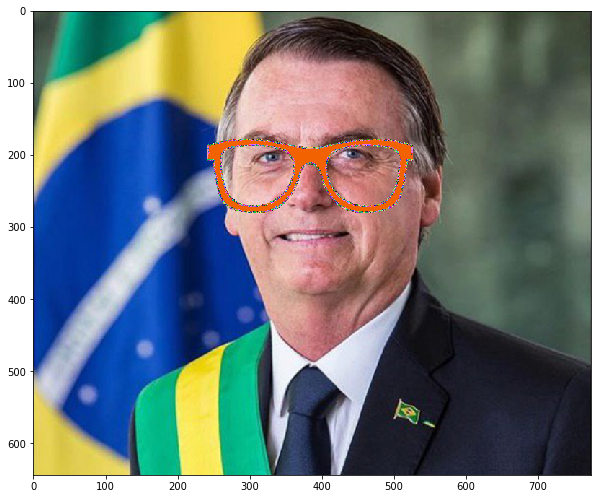

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()

## Vamos testar com outra imagem

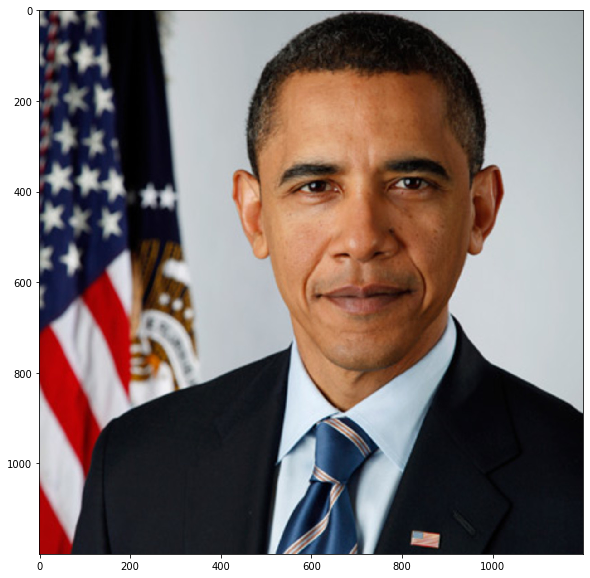

In [38]:
image_03 = cv2.imread('persons/barack_obama.jpg')
image_03 = cv2.cvtColor(image_03, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_03)
plt.show()

## Vamos usar aquele mesmo óculos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


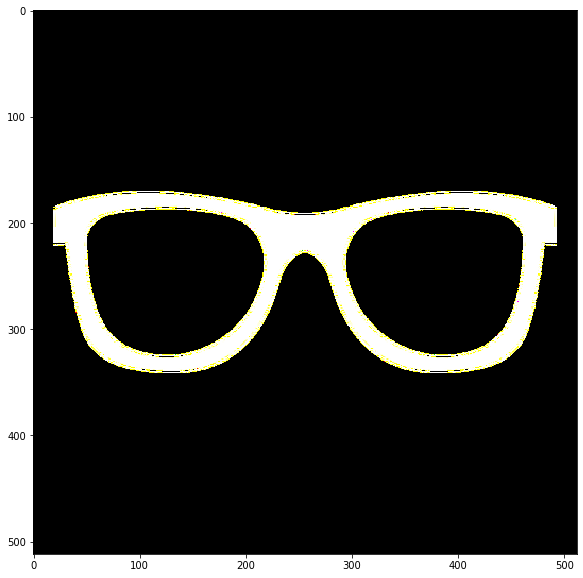

In [39]:
stickers = cv2.imread('stickers/oculos_01.png', -1)
watermark = cv2.resize(stickers, None, fx=1, fy=1)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGRA2RGB))
plt.show()

## E vamos capturar a região dos olhos de novo...

In [40]:
overlay = image_03.copy()
pts = get_coordinates(image_03, 'right_eye', detector, predictor)[0]

ptA = tuple(pts[0])  # Canto esquerdo do olho
ptB = tuple(pts[3])  # Canto direito do olho

ptC = tuple(pts[1])  # Canto superior do olho
ptD = tuple(pts[5])  # Canto inferior do olho

h = abs(ptC[1] - ptD[1])
w = abs(ptA[0] - ptB[0])
offset = 30

# img[y:y+h, x:x+w]
overlay = overlay[ptA[1] - offset: ptA[1] + h,
                  ptA[0] - offset: ptA[0] + w + offset]

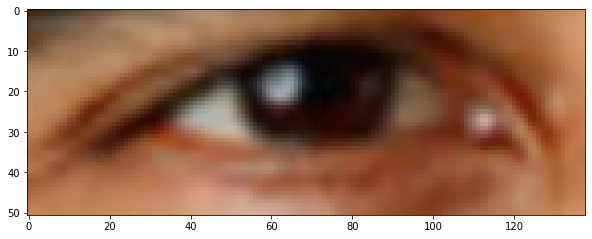

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()

### Agora a melhor parte o/

In [42]:
frame = cv2.cvtColor(image_03, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape

# overlay with 4 channels BGR and Alpha
overlay = frame.copy()
watermark_h, watermark_w, watermark_c = watermark.shape

# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
    for j in range(0, watermark_w):
        if watermark[i,j][3] != 0:
            w_offset = ptB[0] - (w*2) - offset
            h_offset = ptD[1] - (int(ptD[1]/2) + offset)
            overlay[h_offset + i, w_offset + j] = watermark[i, j]

overlay = cv2.cvtColor(overlay, cv2.COLOR_BGRA2RGB)

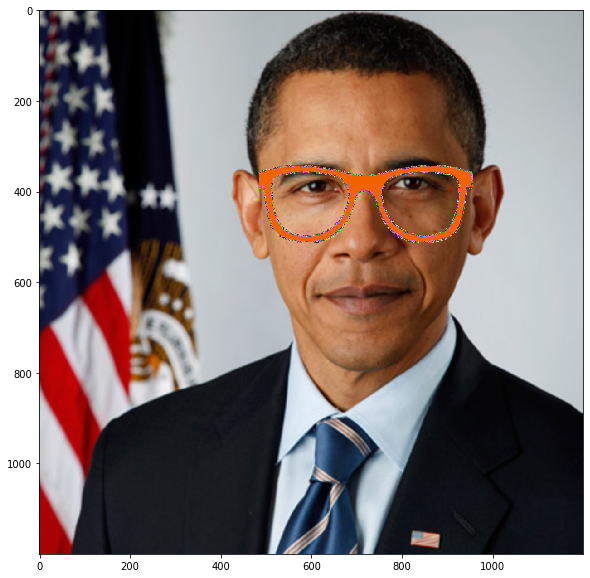

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.show()